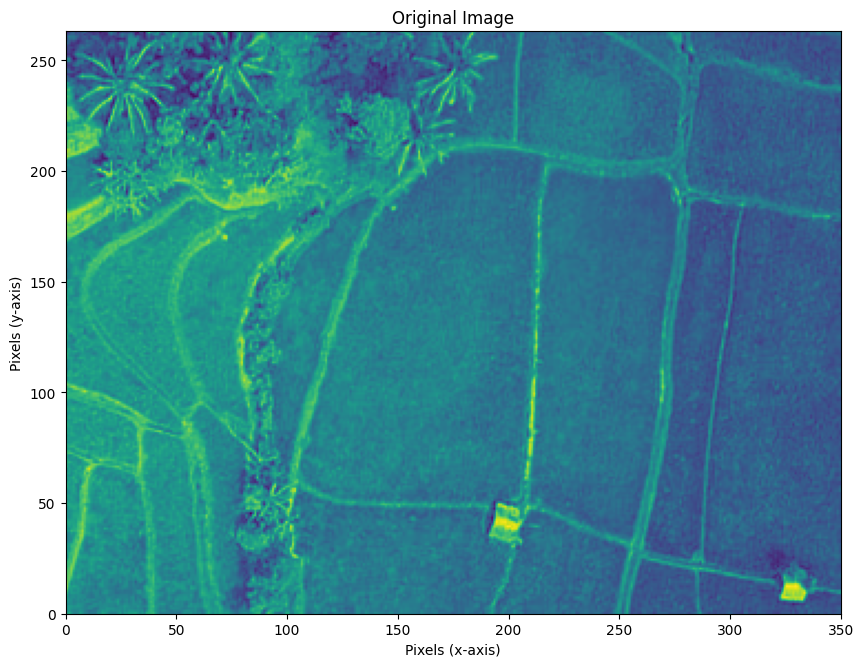

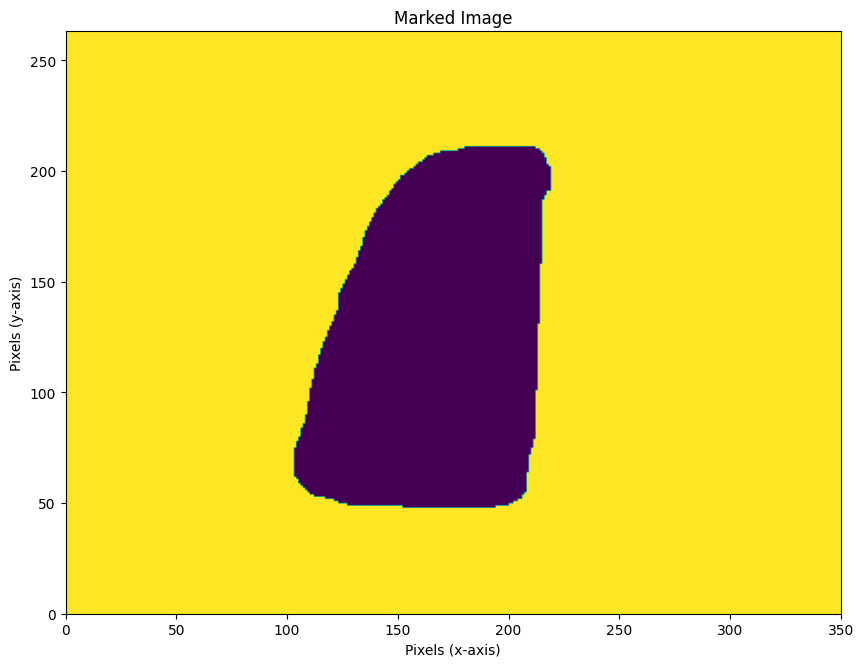

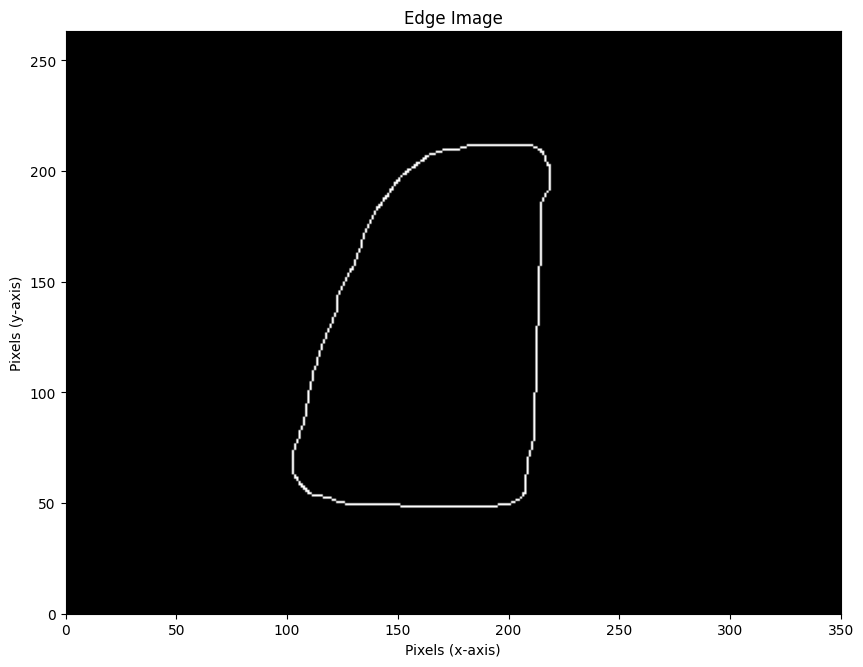

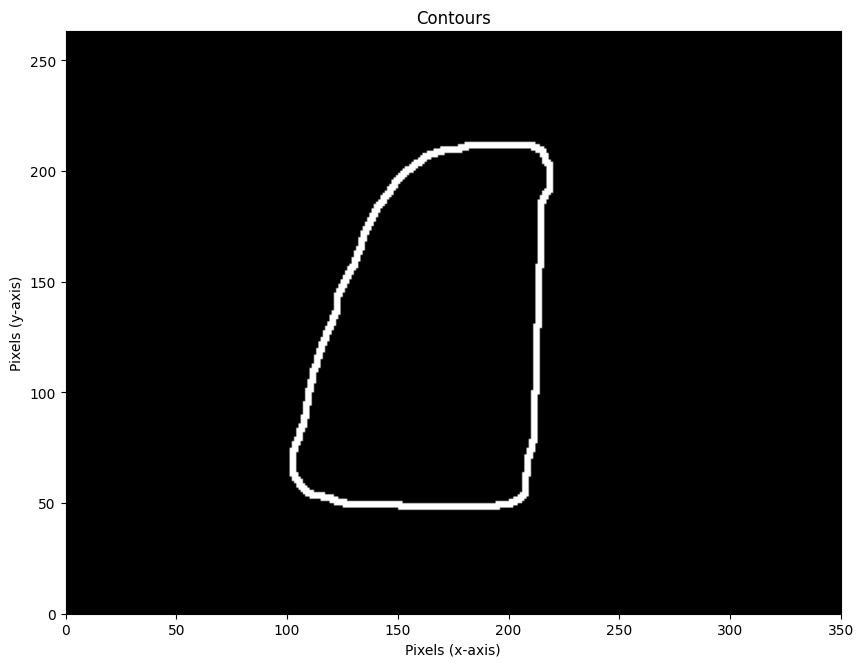

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Note: Upload images to runtime
image_path_1 = '/content/drone1.jpg'
og_img = cv.imread(image_path_1, cv.IMREAD_GRAYSCALE)

image_path_2 = '/content/drone1_marked.png'
img = cv.imread(image_path_2, cv.IMREAD_GRAYSCALE)

# Ensure the image was loaded successfully
assert img is not None, "File could not be read, check with os.path.exists()"

# Detect edges using the Canny edge detector
edges = cv.Canny(img, 120, 150)

# Find contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on a blank canvas
contour_image = np.zeros_like(img)
cv.drawContours(contour_image, contours, -1, (255, 0, 0), 2)  # Draw contours in red

# Define the extent of the axes
x_extent = [0, img.shape[1]]  # Width of the image
y_extent = [0, img.shape[0]]  # Height of the image

# Plot the original image
plt.figure(figsize=(10, 10))
plt.imshow(og_img, extent=x_extent + y_extent)
plt.title('Original Image')
plt.xlabel('Pixels (x-axis)')
plt.ylabel('Pixels (y-axis)')
plt.show()

# Plot the marked image
plt.figure(figsize=(10, 10))
plt.imshow(img, extent=x_extent + y_extent)
plt.title('Marked Image')
plt.xlabel('Pixels (x-axis)')
plt.ylabel('Pixels (y-axis)')
plt.show()

# Plot the edge image
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray', extent=x_extent + y_extent)
plt.title('Edge Image')
plt.xlabel('Pixels (x-axis)')
plt.ylabel('Pixels (y-axis)')
plt.show()

# Plot the contour image
plt.figure(figsize=(10, 10))
plt.imshow(contour_image, cmap='gray', extent=x_extent + y_extent)
plt.title('Contours')
plt.xlabel('Pixels (x-axis)')
plt.ylabel('Pixels (y-axis)')
plt.show()


In [ ]:
# Calculate area using green's theorem
area = 0
for contour in contours:
  area += cv.contourArea(contour)

print("Area in square pixels :", area)

Area in square pixels : 14451.5


In [ ]:
from PIL import Image


image = Image.open(image_path_2)
px_width, px_height = image.size

print("Image Width:", px_width, "px")
print("Image Height:", px_height, "px")

Image Width: 350 px
Image Height: 263 px


In [ ]:
import math
def calculate_area(height, fov_degrees, pixel_height, pixel_width, area_pixels, sensor_width_mm=36, sensor_height_mm=24, focal_length_mm=24, unit='sq-mt'):
    try:
        # Convert FOV from degrees to radians
        fov_radians = math.radians(fov_degrees)

        # Calculate HFOV and VFOV
        hfov_radians = 2 * math.atan((sensor_width_mm / 2) / focal_length_mm)
        vfov_radians = 2 * math.atan((sensor_height_mm / 2) / focal_length_mm)

        # Calculate real-world dimensions
        width_meters_img = 2 * height * math.tan(hfov_radians / 2)
        height_meters_img = 2 * height * math.tan(vfov_radians / 2)

        # Calculate pixel-to-meter conversion factors
        width_pixel_per_metre = width_meters_img / pixel_width
        height_pixel_per_metre = height_meters_img / pixel_height

        # Convert area from square pixels to square meters
        area_meters = area_pixels * (width_pixel_per_metre * height_pixel_per_metre)

        # Optionally convert to square feet
        if unit == 'sq-ft':
            area_sqft = area_meters * 10.7639  # 1 square meter = 10.7639 square feet
            return "{:.2f}".format(area_sqft)
        else:
            return "{:.2f}".format(area_meters)

    except ZeroDivisionError:
        print("Error: Pixel height or width cannot be zero.")
    except ValueError:
        print("Error: Invalid input. Please provide numerical values for all parameters.")
    except Exception as e:
        print("An error occurred:", e)

# Assuming drone is 50m off the ground.
height = 50

# Additional camera information - DJI Mavic 3 Hassleblad Camera
# https://www.dji.com/global/support/product/mavic-3
fov_degrees = 84
sensor_width_mm = 36
sensor_height_mm = 24
focal_length_mm = 24
crop_factor = 2

area_meters = calculate_area(height, fov_degrees, px_height, px_width, area, sensor_width_mm, sensor_height_mm, focal_length_mm)
print("Area in square meters:", area_meters)

# Optionally convert to square feet
area_sqft = calculate_area(height, fov_degrees, px_height, px_width, area, sensor_width_mm, sensor_height_mm, focal_length_mm, unit='sq-ft')
print("Area in square feet:", area_sqft)


Area in square meters: 588.74
Area in square feet: 6337.09
